In [1]:
import numpy as np
import scipy
import pandas as pd

import astropy
import astropy.units as u
import astropy.wcs.utils
import sunpy.visualization.colormaps as cm
import sunpy.data.sample
import sunpy.map
from sunpy.map.header_helper import make_heliographic_header

import glob

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import cv2
import skimage
import skimage.registration
import skimage.transform
import skimage.util
from scipy.ndimage import map_coordinates

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn_image as isns
sns.set_style("darkgrid")
isns.set_image(origin="lower", despine=True)

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras import layers

import utils
import autoenc_model as aem
import data_generator as dg

2023-04-03 20:51:58.912257: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<Quantity 956.68968 arcsec>

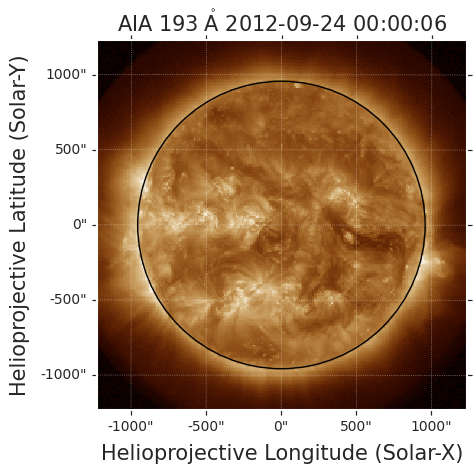

In [2]:
aia_map = sunpy.map.Map("data/aia_193A/2012-09-28T03-30-18.fits")
aia_map.draw_limb(color="black")
aia_map.plot()

aia_map.rsun_obs

(256, 256)
(100, 360)


<AxesSubplot: >

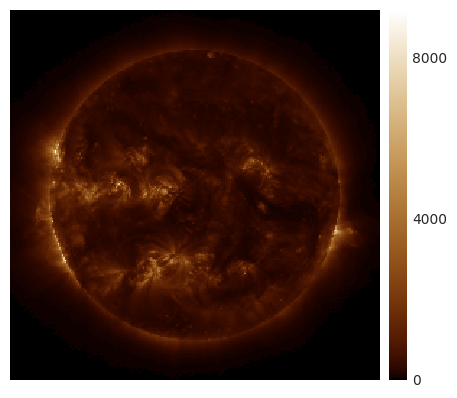

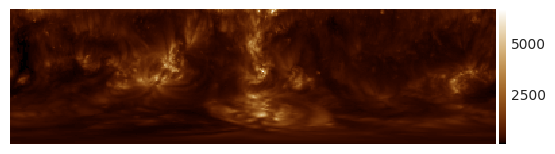

In [3]:
aia_map_matrix = aia_map.data
aia_map_matrix_polar = utils.map_to_polar(aia_map)

print(aia_map_matrix.shape)
print(aia_map_matrix_polar.shape)
isns.imgplot(aia_map_matrix, cmap="sdoaia193")
isns.imgplot(aia_map_matrix_polar, cmap="sdoaia193")

<AxesSubplot: >

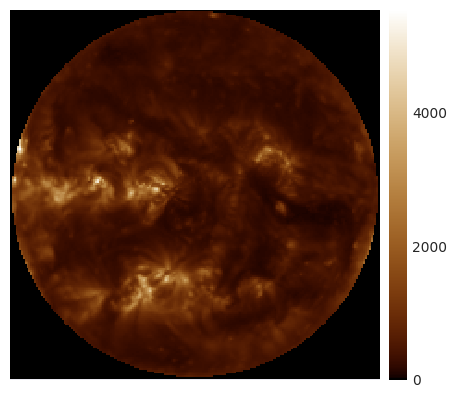

In [4]:
a = utils.polar_linear(aia_map_matrix_polar)
isns.imgplot(a, cmap="sdoaia193")

<Quantity 956.689596 arcsec>

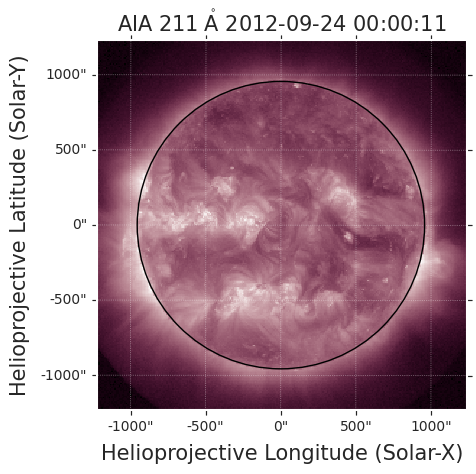

In [5]:
aia211_map = sunpy.map.Map("data/aia_211A/2012-09-28T03-30-26.fits")
aia211_map.draw_limb(color="black")
aia211_map.plot()

aia211_map.rsun_obs

(256, 256)
(100, 360)


<AxesSubplot: >

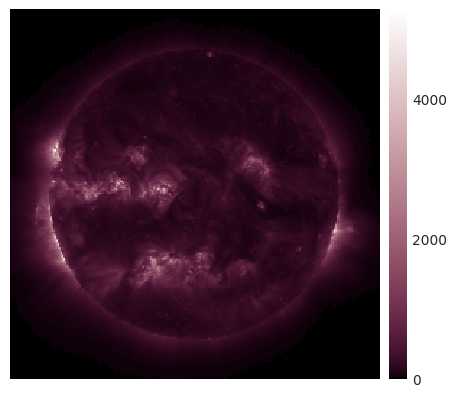

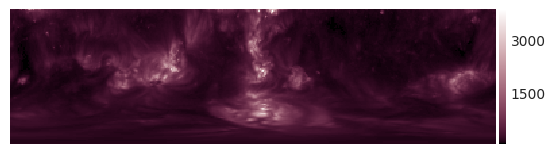

In [6]:
aia211_map_matrix = aia211_map.data
aia211_map_matrix_polar = utils.map_to_polar(aia211_map)

print(aia211_map_matrix.shape)
print(aia211_map_matrix_polar.shape)
isns.imgplot(aia211_map_matrix, cmap="sdoaia211")
isns.imgplot(aia211_map_matrix_polar, cmap="sdoaia211")

<AxesSubplot: >

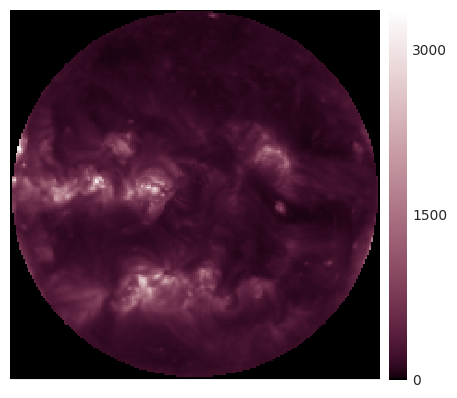

In [7]:
a = utils.polar_linear(aia211_map_matrix_polar)
isns.imgplot(a, cmap="sdoaia211")

<Angle 957.10426727 arcsec>

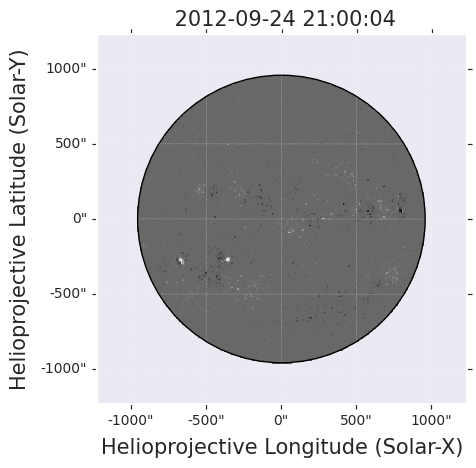

In [8]:
hmi_map = sunpy.map.Map("data/hmi_magnetogram/2012-09-28T12-01-30.fits")
hmi_map.draw_limb(color="black")
hmi_map.plot()

hmi_map.rsun_obs

(256, 256)
(100, 360)


<AxesSubplot: >

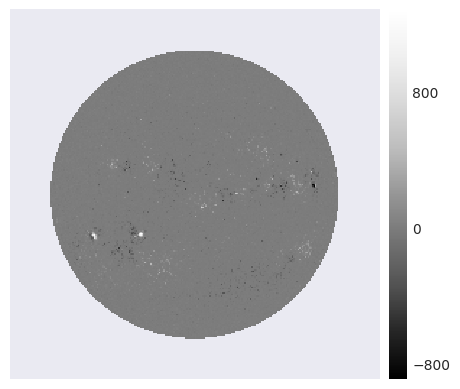

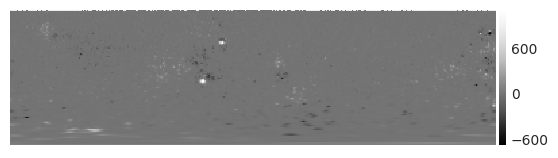

In [9]:
hmi_map_matrix = hmi_map.data
hmi_map_matrix_polar = utils.map_to_polar(hmi_map)

print(hmi_map_matrix.shape)
print(hmi_map_matrix_polar.shape)
isns.imgplot(hmi_map_matrix, cmap="Greys_r")
isns.imgplot(hmi_map_matrix_polar, cmap="Greys_r")

<AxesSubplot: >

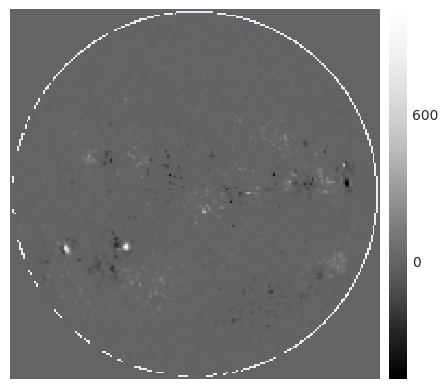

In [10]:
a = utils.polar_linear(hmi_map_matrix_polar)
isns.imgplot(a, cmap="Greys_r")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot: >

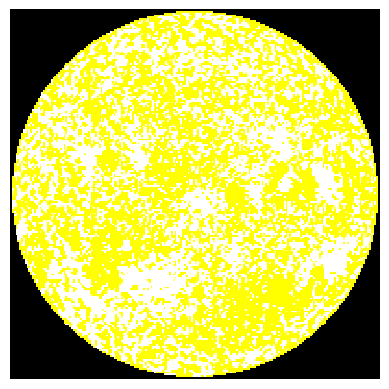

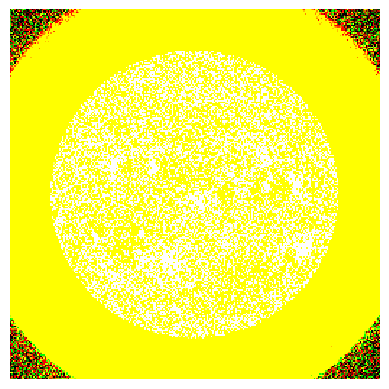

In [12]:
color_img_polar = np.array([aia_map_matrix_polar, aia211_map_matrix_polar, hmi_map_matrix_polar]).transpose(1,2,0)
color_img_orig = np.array([aia_map_matrix, aia211_map_matrix, hmi_map_matrix]).transpose(1,2,0)
color_img = utils.polar_linear(color_img_polar)
isns.imgplot(color_img)
isns.imgplot(color_img_orig)